In [92]:
import numpy as np
import random
import math
import cmath
import matplotlib.pyplot as plt

%matplotlib inline

### Дискретное преобразование Фурье
- Прямое преобразование
$$X_k = \sum_{n = 0}^{N-1}x_n \cdot e^{\frac{-i \cdot 2 \pi\cdot k\cdot n}{N}}$$
- Обратное преобразование
$$x_n = \frac{1}{N}\sum_{k = 0}^{N-1}X_k \cdot e^{\frac{i \cdot 2 \pi\cdot k\cdot n}{N}}$$

In [93]:
# создание набора данных
pi2 = cmath.pi * 2.0
N = 360                            #кол-во значений
a = float(random.randint(1, 100))  #амплитуда
f = float(random.randint(1, 100))  #частота
p = float(random.randint(0, 360))  #фазовый угол


print("frequency = " + str(f))
print("amplitude = " + str(a))
print("phase ang = " + str(p))

x_arr = []
for n in range(N):
    t = float(n) / N * pi2
    x = a * math.sin(f * t + p / 360 * pi2)
    x_arr.append(x)
x_arr1 = x_arr

frequency = 91.0
amplitude = 1.0
phase ang = 18.0


In [94]:
def DFT(x_arr):    #прямое преобразование Фурье
    N = len(x_arr)
    X_arr = []
    for m in range(N):
        X = 0.0
        for n in range(N):
            X += x_arr[n] * cmath.exp(- 1j * pi2 * m * n / N)
        X_arr.append(X / N)
    return X_arr

def IDFT(X_arr):    #обратное преобразование Фурье
    N = len(X_arr)
    x_arr = []
    for n in range(N):
        x = 0.0
        for m in range(N):
            x += X_arr[m] * cmath.exp(1j * pi2 * m * n / N)
        x_arr.append(x)
    return x_arr


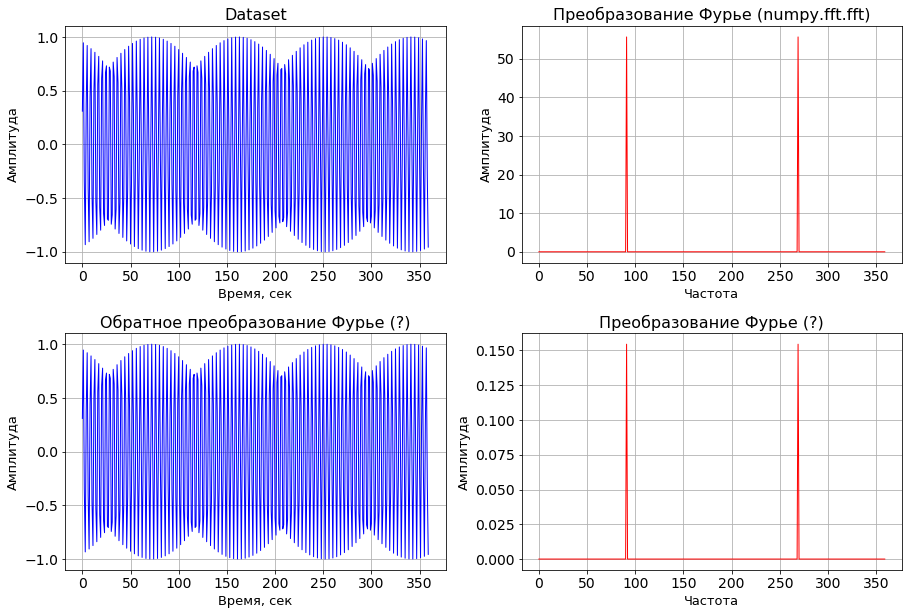

In [96]:
fig,ax = plt.subplots(2,2, figsize = (15,10))

ax[0][0].tick_params(axis = 'both', labelsize = 14)
ax[0][0].set_title('Dataset', fontsize = 16)
ax[0][0].set_xlabel('Время, сек\n', fontsize = 13)
ax[0][0].set_ylabel('Амплитуда', fontsize = 13)
ax[0][0].plot(x_arr1, '-', color = 'blue', lw = 1)
ax[0][0].grid()


ax[0][1].tick_params(axis = 'both', labelsize = 14)
ax[0][1].set_title('Преобразование Фурье (numpy.fft.fft)', fontsize = 16)
ax[0][1].set_xlabel('Частота', fontsize = 13)
ax[0][1].set_ylabel('Амплитуда', fontsize = 13)
ax[0][1].plot(np.fft.fft(x_arr), '-', color = 'red', lw = 1)
ax[0][1].grid()


ax[1][0].tick_params(axis = 'both', labelsize = 14)
ax[1][0].set_title('Обратное преобразование Фурье (?)', fontsize = 16)
ax[1][0].set_xlabel('Время, сек', fontsize = 13)
ax[1][0].set_ylabel('Амплитуда', fontsize = 13)
ax[1][0].plot(IDFT(DFT(x_arr)), '-', color = 'blue', lw = 1)
ax[1][0].grid()


ax[1][1].tick_params(axis = 'both', labelsize = 14)
ax[1][1].set_title('Преобразование Фурье (?)', fontsize = 16)
ax[1][1].set_xlabel('Частота', fontsize = 13)
ax[1][1].set_ylabel('Амплитуда', fontsize = 13)
ax[1][1].plot(DFT(x_arr), '-', color = 'red', lw = 1)
ax[1][1].grid()

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show() 